# Freiburg Notebook

## Imports and General Definitions

In [50]:
# Freiburg dataset import
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.ticker import ScalarFormatter
import numpy as np
import seaborn as sns

pd.options.display.float_format = '{:.0f}'.format
base_colors = ['#e97c6b', '#f7a18a', '#00a78d', '#59c3ad', '#1c352d', '#49916b', '#c2a1b5', '#d6b3c5']

In [39]:
#Freiburg Bikes Sets
freiburg_dataset = "./Freiburg_bikes.csv"
df_freiburg = pd.read_csv(freiburg_dataset)

#df_freiburg.shape #(245472, 5)
df_freiburg.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245472 entries, 0 to 245471
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Datum               245472 non-null  object
 1   Stunde              245472 non-null  int64 
 2   Datetime            245472 non-null  object
 3   Fahrrad-Zählstelle  245472 non-null  int64 
 4   Anzahl Fahrräder    245472 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 9.4+ MB


In [40]:
# I want to drop the column Datetime because it is redundant
df_freiburg = df_freiburg.drop(columns='Datetime')

# I also want to sort my DataFrame, depending on the "Datum" column and also by the "Stunde" column
df_freiburg = df_freiburg.sort_values(by=['Datum','Stunde'], ascending=[True, True])

#df_freiburg.info()
#print(df_freiburg)

In [41]:
# Reset the index of the DataFrame to a continuous sequence starting from 0 to the last value using the reset_index() method with the parameter drop=True.
df_freiburg.reset_index(drop=True, inplace=True)
print(df_freiburg)
df_freiburg.info()

             Datum  Stunde  Fahrrad-Zählstelle  Anzahl Fahrräder
0       2015-01-01       0                   1                16
1       2015-01-01       0                   2                 8
2       2015-01-01       0                   3                 6
3       2015-01-01       0                   4                18
4       2015-01-01       1                   1                41
...            ...     ...                 ...               ...
245467  2021-12-31      22                   4                76
245468  2021-12-31      23                   1                47
245469  2021-12-31      23                   2                17
245470  2021-12-31      23                   3                37
245471  2021-12-31      23                   4                76

[245472 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245472 entries, 0 to 245471
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              ---------

### Monthly Count per Location

In [45]:
# Convert 'Datum' column to datetime
df_freiburg['Datum'] = pd.to_datetime(df_freiburg['Datum'])

# Create a new DataFrame with year-month ('YYYY-MM') values
df_monthly = df_freiburg.copy()
df_monthly['Datum'] = df_monthly['Datum'].dt.to_period('M')

# Group by 'Datum' and 'Fahrrad-Zählstelle' and sum the 'Anzahl Fahrräder' values
df_monthly = df_monthly.groupby(['Datum', 'Fahrrad-Zählstelle']).agg({'Anzahl Fahrräder': 'sum'}).reset_index()

# Print the new DataFrame
print(df_monthly)


       Datum  Fahrrad-Zählstelle  Anzahl Fahrräder
0    2015-01                   1            159300
1    2015-01                   2             33811
2    2015-01                   3             66194
3    2015-01                   4            180887
4    2015-02                   1            144821
..       ...                 ...               ...
331  2021-11                   4            272722
332  2021-12                   1            145360
333  2021-12                   2             64249
334  2021-12                   3             71021
335  2021-12                   4            213647

[336 rows x 3 columns]


### Yearly Count per Location

In [48]:
# Convert 'Datum' column to datetime
#df_freiburg['Datum'] = pd.to_datetime(df_freiburg['Datum'])

# Create a new DataFrame with year-month ('YYYY-MM') values
df_yearly = df_freiburg.copy()
df_yearly['Datum'] = df_yearly['Datum'].dt.to_period('Y')
print(df_yearly)
# Group by 'Datum' and 'Fahrrad-Zählstelle' and sum the 'Anzahl Fahrräder' values
df_yearly = df_yearly.groupby(['Datum', 'Fahrrad-Zählstelle']).agg({'Anzahl Fahrräder': 'sum'}).reset_index()

# Print the new DataFrame
print(df_yearly)

       Datum  Stunde  Fahrrad-Zählstelle  Anzahl Fahrräder
0       2015       0                   1                16
1       2015       0                   2                 8
2       2015       0                   3                 6
3       2015       0                   4                18
4       2015       1                   1                41
...      ...     ...                 ...               ...
245467  2021      22                   4                76
245468  2021      23                   1                47
245469  2021      23                   2                17
245470  2021      23                   3                37
245471  2021      23                   4                76

[245472 rows x 4 columns]
   Datum  Fahrrad-Zählstelle  Anzahl Fahrräder
0   2015                   1           2587770
1   2015                   2            617553
2   2015                   3           1004428
3   2015                   4           3249910
4   2016                   1  

<Figure size 1000x600 with 0 Axes>

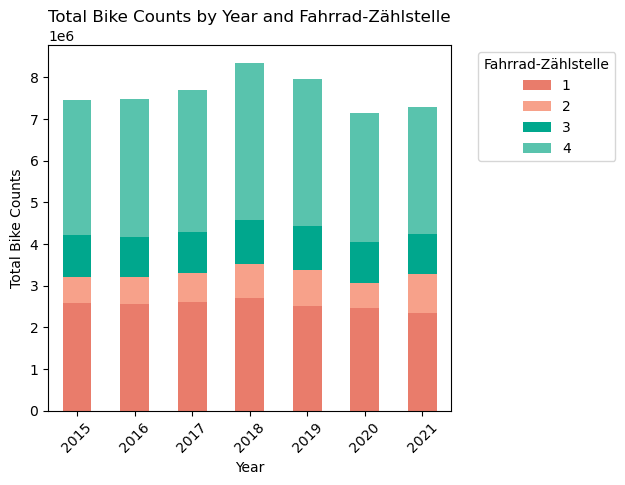

In [54]:
# Group by 'Datum' (year) and sum the 'Anzahl Fahrräder' values for each year
df_yearly_total = df_yearly.groupby('Datum')['Anzahl Fahrräder'].sum().reset_index()

# Pivot the DataFrame to have 'Fahrrad-Zählstelle' as columns and 'Datum' as index
df_pivot = df_yearly.pivot_table(index='Datum', columns='Fahrrad-Zählstelle', values='Anzahl Fahrräder', aggfunc='sum')

# Plot the stacked bar chart
plt.figure(figsize=(10, 6))
df_pivot.plot(kind='bar', stacked=True, color=base_colors)
plt.title('Total Bike Counts by Year and Fahrrad-Zählstelle')
plt.xlabel('Year')
plt.ylabel('Total Bike Counts')
plt.xticks(rotation=45)
plt.legend(title='Fahrrad-Zählstelle', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
